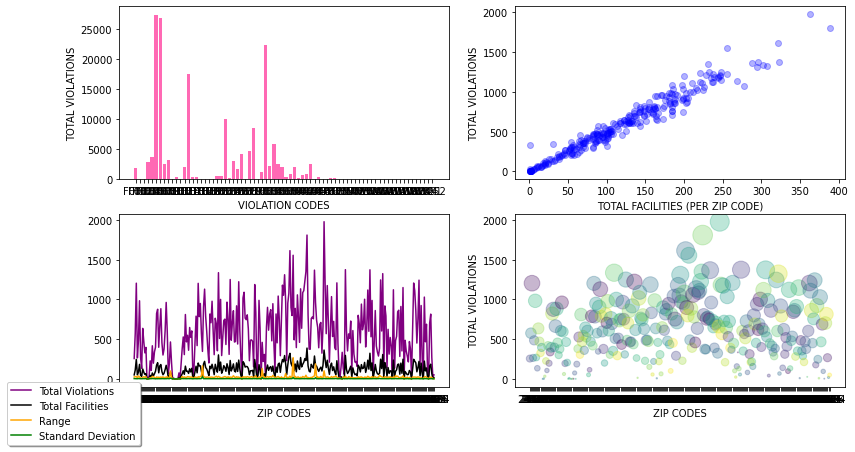

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cbook as cbook


columns = 'columns'
df1_mode =  lambda x:x.value_counts().index[0]


# ---- IMPORT JSON FILES INTO DATAFRAMES ----- #

# Read json file 
df1 = pd.read_json ('/Users/bexa/Documents/Compsci/Advanced Programming/Summative/facilities.json')

# create new YEAR column

# ---- TEST SECTION ----- #

# facility:FA0019645, zip code: 25719. total violations: 4
# print("TEST RESULTS: ", df1.loc[df1['FACILITY ID'] == 'FA0260258' ])



# ---- WRANGLING FOR VIOLATION CODE COUNT SUBSET ----- #

# total violations PER facility
total_score = df1['VIOLATION CODE'].value_counts().reset_index() # reset index
total_score.columns = ['VIOLATION CODE', 'TOTAL VIOLATIONS']
total_score = total_score.sort_values(by=['VIOLATION CODE'])

# Remove values below this total amount
values_below = 0
# Drop rows, keep rest 
total_score = total_score[total_score['TOTAL VIOLATIONS'] > values_below]


# ---- WRANGLING TOTAL VIOLATION PER FACILITY COMPARE AGAINST ZIP CODES ----- #

# Grab df5_merge and count up violations per facility 
df6_count = df1['FACILITY ID'].value_counts().reset_index()

# Total violations of each facility
df6_count.columns = ['FACILITY ID', 'TOTAL VIOLATIONS']

# Add total violations to end of facilities dataframe. 
df6_merge = pd.merge(df1, df6_count, how='inner', on='FACILITY ID')

# Groups by zip then shows total violations per facility grouped via zip code
df6_total = df6_merge.groupby('ZIP CODES')['FACILITY ID'].value_counts().to_frame(name = 'TOTAL VIOLATIONS').reset_index()

# std calculates variability and avg distance from mean
agg_group = [ ('FACILITIES', 'count'), ('VIOLATIONS', 'sum'), ('STD','std'), ('MEAN','mean'),('MEDIAN','median'), ('MODE', df1_mode), ('MIN', 'min'), ('MAX', 'max')]
df6_group = df6_total.groupby('ZIP CODES')['TOTAL VIOLATIONS'].agg(agg_group)
df6_group['RANGE'] = df6_group['MAX'] - df6_group['MIN']

# Fill in empty or NaN values as 0
df6_group = df6_group.fillna(0)

# sort by total violations largest to smallest 
# df6 = df6_group.sort_values(by=['FACILITIES'], ascending=False)

# Resets index and ZIP CODES is now level 0 column header
df6 = df6_group.reset_index()

# Turn zip codes into a string 
df6_str = df6['ZIP CODES'].astype(str)

# Random colours
N = df6.shape[0]
colours = np.random.rand(N)/2

# DF6 is the final cleaned, prepped, wrangled DF to use for graphs #


# ---- CREATE 4 TILE GRAPH ---- #


# name graph window
graphs = plt.figure()
graphs.set_figwidth(13) 
graphs.set_figheight(7) 
# add location of subplots

graph_code = graphs.add_subplot(2, 2, 1)
graph_zip = graphs.add_subplot(2, 2, 2)
graph_std = graphs.add_subplot(2, 2, 3)
graph_series = graphs.add_subplot(2, 2, 4)


# --- BAR GRAPH: TOTAL VIOLATIONS PER VIOLATION CODE ---- # 

graph_code.bar(total_score['VIOLATION CODE'], total_score['TOTAL VIOLATIONS'], color='hotpink')	
graph_code.set_xlabel('VIOLATION CODES')
graph_code.set_ylabel('TOTAL VIOLATIONS')
# graph_code.set_title('TOTAL VIOLATIONS FOR EACH CODE')



# --- DRAW SCATTER GRAPH, VARYING SIZE ZIP / FACILITY / VIOLATION --- # 

# plot zip code on Y axis

# size of each circle plotted 
size = df6['FACILITIES']
graph_series.scatter(df6_str, df6['VIOLATIONS'], c=colours, s=size, alpha=0.3)
graph_series.set_xlabel('ZIP CODES')
graph_series.set_ylabel('TOTAL VIOLATIONS')



# ---- SCATTER GRAPH: FOR ZIP / FACILITY / VIOLATION ---- # 


# Size of dataframe
# Plot size according to total no. of facilities
# area = df6['FACILITIES']

graph_zip.scatter(df6['FACILITIES'], df6['VIOLATIONS'], c='blue', alpha=0.3)

# Titles 
graph_zip.set_xlabel('TOTAL FACILITIES (PER ZIP CODE)')
graph_zip.set_ylabel('TOTAL VIOLATIONS')
# graph_zip.set_title('TOTAL FACILITIES VS TOTAL VIOLATIONS PER ZIP CODE')

# --- LINE GRAPH: STANDARD DEVIATION and RANGE --- # 


# Violations per zip codes
graph_std.plot(df6_str, df6['VIOLATIONS'], color='purple', label='Total Violations')

# Total facilities per zip code
graph_std.plot(df6_str, df6['FACILITIES'], color='black', label='Total Facilities')

graph_std.plot(df6_str, df6['RANGE'], color='orange', label='Range')

graph_std.plot(df6_str, df6['STD'], color='green', label='Standard Deviation')


# Titles 
graph_std.set_xlabel('ZIP CODES')
# graph_std.set_ylabel('TOTAL')

# std_plot.set_xlabel('ZIP CODES')
# std_plot.set_ylabel('STANDARD DEVIATION')
# std_plot.set_title('STANDARD DEVIATION OF TOTAL FACILITIES (PER ZIP)')


# # total violations on X axix
# # size of circle based on size of total facilities 

# # or can do a 3D scatter plot? x = total violation, y = zip codes, z = total facilities

# # Fixing random state for reproducibility

# --- SAVES GRAPH --- #

# plt.savefig('ScatterPlot_08.png')
graphs.legend(loc='lower left', bbox_to_anchor=(0, 0), shadow=True, ncol=1)

# --- SHOW GRAPHS ---- # 

plt.show()




